# Before you buy Bitcoin

## Investigation Overview

In this investigation, I wanted to look at the things to understand about Bitcoin before making an investment. The main focus was on the four variable: **market cap**, **volume**, **date**, **yearly-quarters**. 

## Dataset Overview

The data consisted of historical daily market data of Bitcoin from 2013 - 2019. The original dataset contained the historical market data of the top ten cryptocurrencies from 2013 - 2019. I had to cut out only the Bitcoin data for the purpose of my investigation. No duplicate records and zero price points were removed (if any) . The dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/philmohun/cryptocurrency-financial-data).

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
bitcoin = pd.read_csv('bitcoin-cleaned-data.csv')

In [7]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2169 non-null   int64  
 1   date        2169 non-null   object 
 2   open        2169 non-null   float64
 3   high        2169 non-null   float64
 4   low         2169 non-null   float64
 5   close       2169 non-null   float64
 6   volume      2169 non-null   float64
 7   market_cap  2169 non-null   float64
 8   year        2169 non-null   int64  
 9   month       2169 non-null   object 
 10  quarter     2169 non-null   int64  
 11  price       2169 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 203.5+ KB


## Distribution of Bitcoin Price

Price frequent more below 7,500 USD. Values above 12,500 USD have extremely low occurence. The price of Bitcoin peak highly below 2,500 USD, it will highly risky to purchase Bitcoin at a price above 2,500 USD.

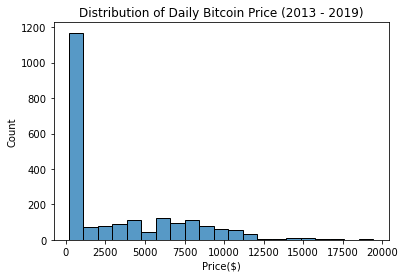

In [24]:
sns.histplot(data=bitcoin['price']).set(title="Distribution of Daily Bitcoin Price (2013 - 2019)", xlabel = 'Price($)');

## Distribution of Bitcoin Market Cap

The distribution of Bitcoin Market Cap is biomodal. The market cap peak between 500 to 1k and peak a little above 10K. Low points at the center between 2K to 5K and also a little above 20k.

PS: The original market cap are in billions, so I had to define a scale from 500 to 20,000.

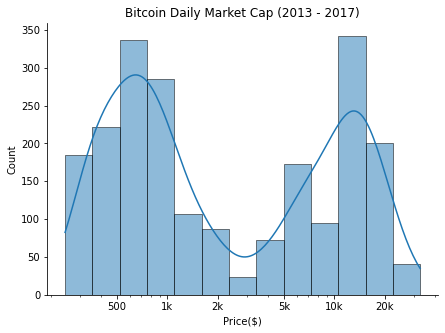

In [23]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data = bitcoin,
    x="market_cap",
    linewidth=.5,
    log_scale=True,
    kde=True,
).set(title="Bitcoin Daily Market Cap (2013 - 2017)", xlabel="Price($)")
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5e9, 1e10, 2e10, 5e10, 1e11, 2e11], [500, '1k', '2k', '5k', '10k', '20k']);

## Price follows Market Cap

Experience Crypto Investors use **market cap** to tell a more complete story and compare value across cryptocurrencies. As a key statistic, it can indicate the growth potential of a cryptocurrency and whether it is safe to buy, compared to others.

This visualization confirms that for Bitcoin. As the market cap increase, the price also increases over the years.

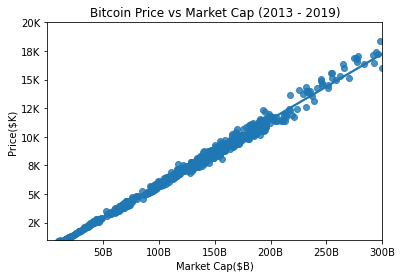

In [57]:
g = sns.regplot(x = 'market_cap', 
            y = 'price', 
            data=bitcoin)

g.set(title="Bitcoin Price vs Market Cap (2013 - 2019)", xlabel="Market Cap($B)", ylabel="Price($K)")
g.set(ylim = (1000, 20000))
ylabels = ['{:,.0f}'.format(y) + 'K' for y in g.get_yticks()/1000]
g.set_yticklabels(ylabels);

g.set(xlim = (1000000, 300000000000))
xlabels = ['{:,.0f}'.format(x) + 'B' for x in g.get_xticks()/1000000000]
g.set_xticklabels(xlabels);

## Price follows trading volume (but..)

**Trading volume** is the amount of buy and sell order in the bitcoin market.

The more people buy and sell bitcoin, the price tend to increase. But, trading volume is not a good key indicator for understanding crypto price as much as **market cap**, as not all trades are **buy** orders. If there more people are selling their Bitcoin, the price will eventually go down and may result to a crash.

Rather use the Trading Volume to measure the level of activities going on in the Bitcoin market.

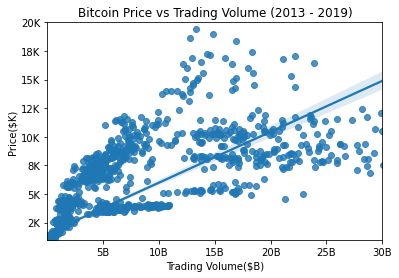

In [60]:
g = sns.regplot(x = 'volume', 
            y = 'price', 
            data=bitcoin)

g.set(title="Bitcoin Price vs Trading Volume (2013 - 2019)", xlabel="Trading Volume($B)", ylabel="Price($K)")
g.set(ylim = (1000, 20000))
ylabels = ['{:,.0f}'.format(y) + 'K' for y in g.get_yticks()/1000]
g.set_yticklabels(ylabels);

g.set(xlim = (1000000, 30000000000))
xlabels = ['{:,.0f}'.format(x) + 'B' for x in g.get_xticks()/1000000000]
g.set_xticklabels(xlabels);

## Bitcoin is a long term game

**The price of Bitcoin perform better overall over the years**. However, looking at it short term performance(every 3 months), there are multiple ups and downs and they are hard to predict or measure. Also, it will interest you to note that in every upward movements there is a downward spiral that follows (vis-a-vis), although it will be hard to figure if the next move will be up or down and when it will happen.

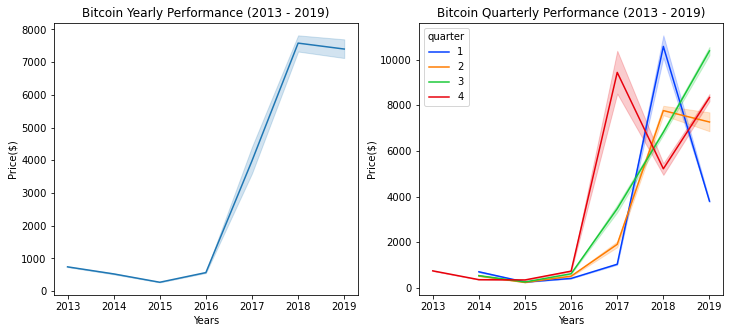

In [66]:
fig = plt.figure(figsize= (12,5))

# plot on the left
df_btc_1000 = bitcoin[bitcoin['price'] < 5000]
# add subplot
ax=fig.add_subplot(1, 2, 1)
sns.lineplot(
    x="year", 
    y="price",
    data=bitcoin,
    palette='bright').set(title='Bitcoin Yearly Performance (2013 - 2019)', xlabel='Years', ylabel='Price($)');

# plot on the middle
df_btc_8000 = bitcoin[bitcoin['price'] > 10000]
# add subplot
ax=fig.add_subplot(1, 2, 2)
sns.lineplot(
    x="year", 
    y="price",
    data=bitcoin,
    palette='bright',
    hue='quarter').set(title='Bitcoin Quarterly Performance (2013 - 2019)', xlabel='Years', ylabel='Price($)');

## Disclaimer
This is not an investment advice or solication to buy Bitcoin or any other crypto assets. This report was done only for educational purposes.